# 1. Research Problem:
To Build a Knowledge Representation Learning for cyber security down streaming task such as missing node prediction using NLP

# 2. Research Methodology:

- Literature Survey
- Data Collection
- Data Preprocessing
- Data Featurization
- NER Model Building
- NER Model validation
- KG creation
- KRL embedding creation using SOTA model
- KRL model validation for Node prediction


## 2.1 Lierature Survey

I have undergone 15 papers to understand KG , Cyber KG and KRL
KG - 8
Security KG - 7


## 2.1 Data Collection

We have used 2 sources for collecting cyber security blogs such as 

1.Alienvault otx pulse: (Dataset - 3286 , Major Columns : Adversaries , Malwares , Description about the blog,  File and IP indicators and so on)

2.Threatpost blog:(Dataset - 105 blogs in html content)

In [1]:
from datetime import datetime, timedelta
import pandas
import bs4
import json
import string
import re
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler,normalize
import gc
import warnings
import itertools
import nltk
import scipy.stats
from sklearn_crfsuite import CRF
import argparse
from sklearn.model_selection import train_test_split
from sklearn_crfsuite import metrics
import numpy
from nltk.corpus import stopwords
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer
#from gensim.models import KeyedVectors
from collections import Counter
from collections import OrderedDict

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
warnings.filterwarnings("ignore")

[nltk_data] Downloading package punkt to C:\Users\Ravi
[nltk_data]     kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Ravi kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to C:\Users\Ravi
[nltk_data]     kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# otx=pandas.read_excel("./otx/otxfile2021-05-15.xlsx")
# otx.head()

In [3]:
# threatpost=pandas.read_excel("./threatpost/threatpostfile2021-05-15.xlsx")
# threatpost.rename(columns = {'blog':'description','date':'created'}, inplace = True)
# threatpost.head()

In [31]:
import os
os.getcwd()

'C:\\Users\\Ravi kumar\\Downloads\\data-20220512T190600Z-001\\resumes_samples'

In [5]:
os.chdir(r"C:\Users\Ravi kumar\Downloads\data-20220512T190600Z-001\resumes_samples")
os.getcwd()

'C:\\Users\\Ravi kumar\\Downloads\\data-20220512T190600Z-001\\resumes_samples'

In [35]:
import sys,fitz
import pandas as pd
temp = pd.DataFrame()

In [36]:
len(os.listdir(r'C:\Users\Ravi kumar\Downloads\Resume_samples'))

133

In [37]:
c=0
for resume in os.listdir():
    doc = fitz.open(resume)
    text = ""
    for page in doc:
        text = text+str(page.getText())
        text = " ".join(text.split("\n"))
    temp.loc[c,'data'] = text
    c=c+1

temp

Deprecation: 'getText' removed from class 'Page' after v1.19 - use 'get_text'.


,data
0,HR PERSONNEL ASSISTANT Summary I am a U.S. cit...
1,HR BENEFITS/LEAVE COORDINATOR Summary 13 years...
2,HR MANAGER Summary Human Resources Manager wit...
3,HR GENERALIST Summary Dedicated and focused Ad...
4,HR EMPLOYEE RELATIONS SPECIALIST Summary Dedic...
...,...
128,Senior Web Developer specializing in front...
129,Elizabeth Holmes +1 (970) 333-3833 elizab...
130,Sheetal Sahu Quality Analyst  +91 9404538689 ...
131,Sowmya V Contact No.: +91-9845007997 | E-Mail...


In [39]:
# temp.to_csv('ner_ravi.csv',index=False)

In [40]:
# temp.to_csv('temp_ravi.csv',index=False)

In [41]:
# "EXPEREINEC":['1 years',"2 years","3 years","4 years","5 years","6 years","7 years","8 years","9 years",
#               "one year","two years","three years","four years","five years","six years","seven years",
#               "eight years","nine years","2+","3+","4+","5+","6+","7+","8+","9+"]
    
# "Name":['Diya','Tejaswini','Kiran','Ravi','Dev','Rhuthu','Ashita','Alex','Alok','Vivek','Arush','Praveen','Aditya','Nishant',
#        'Raju','Gaurav','Sonu','Prashant','Anupam','Sumit','Chandan','Deepak','Jyoti','Prakash',"Rama","Vinayak","Rakesh",
#         "Rohit","Radhe","Nakul","Arjun","Sahdev","Vikram","Kriti","Yuvraj","Anil","Sheetal","Sowmya","Swadha","Ritu","Indu",
#         "Uzma","Charan","Kaushal","Haya Fathim",
#        ]
    
    
# "college":["IIT","NIT","B.tech","M.tech","B.E","Engineering","M.E","SRM","RV","BIT","BITS"]
# "Mail id":["ravi@gmail.com",'diya@gmail.com',"kiran@gmail.com","rhuthu93@gmail.com","alok.raj999@gmail.com"]

In [42]:
# d = {"skills": ["windows", "mac", "macos", "android", "linux", "unix", "apple", "xplat","M.L.","Machine learning","Data science",
# "deep learniing","computer vision","neural network","python","NLP","D.L","c++","java","angular","R","statistics","tensorflow","keras",
# "pytorch","java script"], 
# "EXPERIENCE": ['1 years',"2 years","3 years","4 years","5 years","6 years","7 years","8 years","9 years",
#  "one year","two years","three years","four years","five years","six years","seven years","eight years","nine years","2+","3+",
# "4+","5+","6+","7+","8+","9+"], 
# "Name": ['Diya','Tejaswini','Kiran','Ravi','Dev','Rhuthu','Ashita','Alex','Alok','Vivek','Arush',
# 'Praveen','Aditya','Nishant','Raju','Gaurav','Sonu','Prashant','Anupam','Sumit','Chandan','Deepak','Jyoti','Prakash',"Rama",
# "Vinayak","Rakesh","Rohit","Radhe","Nakul","Arjun","Sahdev","Vikram","Kriti","Yuvraj","Anil","Sheetal","Sowmya","Swadha","Ritu","Indu",
# "Uzma","Charan","Kaushal","Haya Fathim"],
# "college":["IIT","NIT","B.tech","M.tech","B.E","Engineering","M.E","SRM","RV","BIT","BITS"],
 
# "Mail id": ["ravi@gmail.com",'diya@gmail.com',"kiran@gmail.com","rhuthu93@gmail.com","alok.raj999@gmail.com"]}
# d

In [43]:
# Serializing json  
# json_object = json.dumps(d) 
# with open('somefile.json', 'a',encoding="utf-8") as file:
#     file.write(json_object)

## 2.2 Data Preprocessing

In [44]:
def normalizeText(text):

    # Remove unprintable characters
    textFilter = filter(lambda x: x in string.printable, text)
    ntext = "".join([w for w in textFilter])

    # Remove punctuation
    spaces = " "*len(string.punctuation)
    translation = str.maketrans(string.punctuation, spaces)
    ntext = ntext.translate(translation)

    # Removing multiple linebreaks
    lines = (line.strip() for line in ntext.splitlines())
    chunks = (phrase.strip() for line in lines for phrase in line.split("  "))
    ntext = ' '.join(chunk for chunk in chunks if chunk)

    # Make all lowercase
    ntext = ntext.lower()

    # Create phrases instead of tag words
    # Getting tag data from json
    tagFile = r"C:\Users\Ravi kumar\Downloads\data-20220512T190600Z-001\somefile.json"
    
    with open(tagFile, 'r') as tagFileHandle:
        
        tagData = json.load(tagFileHandle)
       
    tagList = [tagData[tags] for tags in tagData]
    tagList = list(itertools.chain.from_iterable(tagList))
    phraseList = [" ".join(tag.split('_')) for tag in tagList
                  if len(tag.split("_")) > 1]
    for phrase in phraseList:
        ntext = ntext.replace(phrase, "_".join(phrase.split(" ")))

    return ntext

In [45]:
temp['data']=temp['data'].fillna("data not found")
temp['data1']=temp['data'].apply(lambda x: normalizeText(x))
temp['data1']

0      hr personnel assistant summary i am a u s citi...
1      hr benefits leave coordinator summary 13 years...
2      hr manager summary human resources manager wit...
3      hr generalist summary dedicated and focused ad...
4      hr employee relations specialist summary dedic...
                             ...                        
128    senior web developer specializing in front end...
129    elizabeth holmes 1 970 333 3833 elizabeth holm...
130    sheetal sahu quality analyst 91 9404538689 sah...
131    sowmya v contact no 91 9845007997 e mail sowmy...
132    1 yp professional summary 3 months of experien...
Name: data1, Length: 133, dtype: object

In [46]:
## tratment of missing value
temp['data1']=temp['data1'].fillna("data not found")
temp=temp.fillna('[]')

## 2.3 Data Featurization

# Ontology

Software/Malware/Tool : An entity that relates to a piece of code usually used as tool such as Office or Unix operating system. An entity that refers to malicious code and/or software which is inserted into a system.

OS : An entity that dfines the operating system.

Attack-pattern/Technique : An entity that refers to steps that could
result in an active attack on an individual or group of
users.

Group/Actor : An entity that refers to grouping of activities
that could lead to a malicious attack

Indicators: File Sha or ip/url


# Relationship

uses : Relationship where the subject entity belongs to a campaign or malware class and object entity belongs to a tool or software class, wherein subject entity aims to leverage object entity to carry on an attack.(Malware , Uses , OS) & (Actors , uses , Techniques)

indicates : Relationship where the subject entity belongs to a indicator class and object entity belongs to a malware or campaign class, wherein indicates. demonstrates presence or after effects of a object entity. (Indicators , indicates , malware) 

attributed-to : Relationship where the subject entity belongs to campaign or intrusion-set class and object entity belongs to threat actor class wherein subject entity is attributed to object entity. (Malware , attributed-to , Actor)

In [47]:
def isMixedCaps(word):
    isCap = sum([c.isupper() for c in word[1:]])
    isLower = sum([c.islower() for c in word])
    return isCap > 0 and isLower > 0


def OrthographicFeature(word):
    if word.isupper():
        orthotag = 'ALLCAPS'
    elif word.islower():
        orthotag = 'LOWERCASE'
    elif isMixedCaps(word):
        orthotag = 'MIXEDCAPS'
    elif len(word) > 0 and word[0].isupper():
        orthotag = 'UPPER_INITIAL'
    else:
        orthotag = 'NONE'
    return orthotag


def isPunctuation(word):
    return sum([c not in string.punctuation for c in word]) == 0


def isOtherSymbol(word):
    val = sum([c in string.punctuation or c.isalpha()
               or c.isdigit() for c in word]) == 0
    return val


def isAlpunct(word):
    val = (len(word) == len([c for c in word if c in string.punctuation])
           + len([c for c in word if c.isalpha()]))
    return val


def containsApt(word):
    if "apt" in word.lower():
        return True
    else:
        return False

def wordtypeFeature(word):
    if word == "reSHA256hash":
        wttag = "SHA256"
    elif word == "reSHA1hash":
        wttag = "SHA1"
    elif word == "reMD5hash":
        wttag = "MD5"
    elif word == "reIPv4Address":
        wttag = "IP"
    elif word == "reURL":
        wttag = "URL"
    elif word == "reDomain":
        wttag = "DOMAINADD"
    elif word == "reEmailAddress":
        wttag = "EMAILADD"
    elif containsApt(word):
        wttag = 'TGROUP'
    elif word.isalpha():
        wttag = 'WORD'
    elif word.isdigit():
        wttag = 'NUMBER'
    elif isPunctuation(word):
        wttag = 'PUNCTUATION'
    elif word.isalnum():
        wttag = 'ALNUM'
    elif isAlpunct(word):
        wttag = 'ALPUNC'
    elif isOtherSymbol(word):
        wttag = 'SYMBOL'
    else:
        wttag = 'NONE'
    return wttag

def word2vecFeature(w2vmodel, word, size):
    featuredict = {}
    word = word.lower()
    wordVec = numpy.zeros(size)
    if word in w2vmodel:
        wordVec = w2vmodel[word]
    featuredict = {"em"+str(i): wordVec[i] for i in range(0, size)}
    return featuredict


def wordFeaturizer(doc, index, w2vmodel, size=50, useWordFeatures=True,
                   useEmbeddings=True):
    word, pos = doc[index]
    commonDict = {}
    commonDict['word'] = word
    featureDict = {}
    # init the stemmer
    if useWordFeatures:
        stemmer = nltk.stem.snowball.SnowballStemmer('english')
        posTagMapping = {'NN': 'Noun',
                         'NNP': 'Noun',
                         'NNPS': 'Noun',
                         'NNS': 'Noun',
                         'VB': 'Verb',
                         'VBD': 'Verb',
                         'VBG': 'Verb',
                         'VBN': 'Verb',
                         'VBP': 'Verb',
                         'VBZ': 'Verb',
                         'JJ': 'Adj',
                         'JJR': 'Adj',
                         'JJS': 'Adj'}
        if pos in posTagMapping:
            pos = posTagMapping[pos]

        # keyWordList = ["Operation", "APT", "Campaign"]
        featureDict = {
            'lemma': stemmer.stem(word),
            'pos': pos,
            'orthotag': OrthographicFeature(word),
            'wordtype': wordtypeFeature(word),
          
        }
        if index > 0:
            pword, ppos = doc[index - 1]
            if ppos in posTagMapping:
                ppos = posTagMapping[ppos]
            featureDict["pword"] = pword
            featureDict["plemma"] = stemmer.stem(pword)
            featureDict["ppos"] = ppos
            featureDict["porthotag"] = OrthographicFeature(pword)
            featureDict["pwordtype"] = wordtypeFeature(pword)
        else:
            featureDict["BOD"] = True

        if index < len(doc)-1:
            nword, npos = doc[index + 1]
            if npos in posTagMapping:
                npos = posTagMapping[npos]
            featureDict["nword"] = nword
            featureDict["nlemma"] = stemmer.stem(nword)
            featureDict["npos"] = npos
            featureDict["northotag"] = OrthographicFeature(nword)
            featureDict["nwordtype"] = wordtypeFeature(nword)
        else:
            featureDict["EOD"] = True

    if useEmbeddings:
        embeddingsDict = word2vecFeature(w2vmodel, word.lower(), size)
    else:
        embeddingsDict = {}
    totalDict = {**commonDict, **featureDict, **embeddingsDict}

    return totalDict


def docFeaturizer(doc, model, size, useWordFeatures=True, useEmbeddings=True):
    return [wordFeaturizer(doc, i, model, size, useWordFeatures, useEmbeddings)
            for i in range(len(doc))]


def docLabelizer(doc, tagFile):
    with open(tagFile, 'r') as tagFileHandle:
        tagData = json.load(tagFileHandle)

    trainList = doc
    labelList = []

    # Reversing the dictionary
    tagDict = {}
    for key, value in tagData.items():
        for astring in value:
            tagDict[astring] = key

    # Adding tags to our data
    i = 0
    while i < len(trainList):
        # using a while loop here since for loops don't allow
        # the i variable to be updated
        if trainList[i].lower() in tagDict:
            phrase = trainList[i].lower()
            labelList.append("B-" + tagDict[phrase])
        elif " ".join(trainList[i:i+2]).lower() in tagDict:
            # In Pandas [i:i+2] results in list of i,i+1
            phrase = " ".join(trainList[i:i+2]).lower()
            labelList.append("B-" + tagDict[phrase])
            labelList.append("I-" + tagDict[phrase])
            i = i + 1
        elif " ".join(trainList[i:i+3]).lower() in tagDict:
            # In Pandas [i:i+3] results in list of i,i+1, i+2
            phrase = " ".join(trainList[i:i+3]).lower()
            labelList.append("B-" + tagDict[phrase])
            labelList.append("I-" + tagDict[phrase])
            labelList.append("I-" + tagDict[phrase])
            i = i + 2
        elif " ".join(trainList[i:i+4]).lower() in tagDict:
            # In Pandas [i:i+3] results in list of i,i+1, i+2
            phrase = " ".join(trainList[i:i+4]).lower()
            labelList.append("B-" + tagDict[phrase])
            labelList.append("I-" + tagDict[phrase])
            labelList.append("I-" + tagDict[phrase])
            labelList.append("I-" + tagDict[phrase])
            i = i + 3
        elif " ".join(trainList[i:i+5]).lower() in tagDict:
            # In Pandas [i:i+3] results in list of i,i+1, i+2
            phrase = " ".join(trainList[i:i+5]).lower()
            labelList.append("B-" + tagDict[phrase])
            labelList.append("I-" + tagDict[phrase])
            labelList.append("I-" + tagDict[phrase])
            labelList.append("I-" + tagDict[phrase])
            labelList.append("I-" + tagDict[phrase])
            i = i + 4
        elif " ".join(trainList[i:i+6]).lower() in tagDict:
            # In Pandas [i:i+3] results in list of i,i+1, i+2
            phrase = " ".join(trainList[i:i+6]).lower()
            labelList.append("B-" + tagDict[phrase])
            labelList.append("I-" + tagDict[phrase])
            labelList.append("I-" + tagDict[phrase])
            labelList.append("I-" + tagDict[phrase])
            labelList.append("I-" + tagDict[phrase])
            labelList.append("I-" + tagDict[phrase])
            i = i + 5
        else:
            labelList.append("O")
        i = i+1
    return labelList

In [48]:
'''import attackcti
from attackcti import attack_client
lift = attack_client()
lift.get_enterprise().keys()
#Technique
all_techniques = lift.get_techniques(stix_format=False)
all_techniques = lift.remove_revoked(all_techniques)
print(len(all_techniques))
technique=list(pandas.DataFrame(all_techniques)['technique'])

#Actor
all_actors = lift.get_groups(stix_format=False)
all_actors = lift.remove_revoked(all_actors)
print(len(all_actors))
actor=list(pandas.DataFrame(all_actors)['group_aliases'])
actor=[item for sublist in actor for item in sublist]

#Tools/malwares
all_tools = lift.get_software(stix_format=False)
all_tools = lift.remove_revoked(all_tools)
print(len(all_tools))
tools=list(pandas.DataFrame(all_tools)['software'])

##update
with open('tags.json') as data_file:    
    old_data = json.load(data_file)
    
ind=[]

for i in range(0,len(ind_data)):
    ind.append(ind_data[i]['label'])

    
old_data['BADACTOR'].extend(actor)    
old_data['BADACTOR']=list(set([x.lower() for x in old_data['BADACTOR']]))
old_data['MALWARE'].extend(tools)    
old_data['MALWARE']=list(set([x.lower() for x in old_data['MALWARE']]))
old_data['TECHNIQUE'].extend(technique)    
old_data['TECHNIQUE']=list(set([x.lower() for x in old_data['TECHNIQUE']]))
old_data['Industry'].extend(ind)    
old_data['Industry']=list(set([x.lower() for x in old_data['Industry']]))


with open('tags.json','w') as data_file:    
    data_file.write(json.dumps(old_data))'''

"import attackcti\nfrom attackcti import attack_client\nlift = attack_client()\nlift.get_enterprise().keys()\n#Technique\nall_techniques = lift.get_techniques(stix_format=False)\nall_techniques = lift.remove_revoked(all_techniques)\nprint(len(all_techniques))\ntechnique=list(pandas.DataFrame(all_techniques)['technique'])\n\n#Actor\nall_actors = lift.get_groups(stix_format=False)\nall_actors = lift.remove_revoked(all_actors)\nprint(len(all_actors))\nactor=list(pandas.DataFrame(all_actors)['group_aliases'])\nactor=[item for sublist in actor for item in sublist]\n\n#Tools/malwares\nall_tools = lift.get_software(stix_format=False)\nall_tools = lift.remove_revoked(all_tools)\nprint(len(all_tools))\ntools=list(pandas.DataFrame(all_tools)['software'])\n\n##update\nwith open('tags.json') as data_file:    \n    old_data = json.load(data_file)\n    \nind=[]\n\nfor i in range(0,len(ind_data)):\n    ind.append(ind_data[i]['label'])\n\n    \nold_data['BADACTOR'].extend(actor)    \nold_data['BADACTO

In [49]:
# Check the Tag file

with open(r"C:\Users\Ravi kumar\Downloads\data-20220512T190600Z-001\somefile.json") as json_file:
    data=json.load(json_file)
    
data.keys()

dict_keys(['skills', 'EXPERIENCE', 'Name', 'college', 'Mail id'])

In [50]:
# #### load w2vec
# import os
# from gensim.models import KeyedVectors
# model = KeyedVectors.load("./cybervec/cyber_corpus")

In [51]:
# from gensim.models import KeyedVectors
# KeyedVectors.word_vec()

In [52]:
os.listdir(r"C:\Users\Ravi kumar\Downloads\data-20220512T190600Z-001")

['.ipynb_checkpoints',
 'data',
 'glove',
 'glove.6B.zip',
 'my_approach.ipynb',
 'resumes_samples',
 'somefile.json']

In [23]:
import os
import zipfile
# with zipfile.ZipFile(r"C:\Users\Ravi kumar\Downloads\data-20220512T190600Z-001\glove.6B.zip", 'r') as zip_ref:
#     zip_ref.extractall(r'C:\Users\Ravi kumar\Downloads\data-20220512T190600Z-001\glove')

In [53]:
import numpy as np
embeddings_index = {}
f = open(r'C:\Users\Ravi kumar\Downloads\data-20220512T190600Z-001\glove\glove.6B.300d.txt',encoding='utf-8')
for line in f:
    values = line.split()
    
    word = values[0]
    
    coefs = np.asarray(values[1:], dtype='float32')
    
    embeddings_index[word] = coefs

f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [146]:
# import numpy as np

# def load_glove_model(File):
#     print("Loading Glove Model")
#     glove_model = {}
#     with open(File,'r') as f:
#         for line in f:
#             split_line = line.split()
#             word = split_line[0]
#             embedding = np.array(split_line[1:], dtype=np.float64)
#             glove_model[word] = embedding
#     print(f"{len(glove_model)} words loaded!")
#     return glove_model

# glove_model = load_glove_model(r'C:\Users\Ravi kumar\Downloads\data-20220512T190600Z-001\glove\glove.6B.300d.txt')

In [149]:
#embeddings_index

In [54]:
temp.head()

,data,data1
0,HR PERSONNEL ASSISTANT Summary I am a U.S. cit...,hr personnel assistant summary i am a u s citi...
1,HR BENEFITS/LEAVE COORDINATOR Summary 13 years...,hr benefits leave coordinator summary 13 years...
2,HR MANAGER Summary Human Resources Manager wit...,hr manager summary human resources manager wit...
3,HR GENERALIST Summary Dedicated and focused Ad...,hr generalist summary dedicated and focused ad...
4,HR EMPLOYEE RELATIONS SPECIALIST Summary Dedic...,hr employee relations specialist summary dedic...


In [55]:
temp['Processed'] = temp.data1.apply(nltk.word_tokenize)
temp['Processed1']=temp['Processed'].apply(lambda x:[w for w in x if not w in stop_words])
temp['Processed2']=temp['Processed1'].apply(lambda x:[w for w in x if len(w)>2])
temp['Tagged'] = temp.Processed2.apply(nltk.pos_tag)
temp['XArray']= temp.Tagged.apply(docFeaturizer, args=(embeddings_index, 50))
temp['YArray'] = temp.Processed2.apply(docLabelizer,args = (r"C:\Users\Ravi kumar\Downloads\data-20220512T190600Z-001\somefile.json",))

train,test= train_test_split(temp, test_size=0.2, random_state=1010)

In [56]:
train.shape

(106, 8)

In [57]:
test.shape

(27, 8)

In [58]:
list(temp['XArray'])[0][2]

{'word': 'summary',
 'lemma': 'summari',
 'pos': 'Adj',
 'orthotag': 'LOWERCASE',
 'wordtype': 'WORD',
 'pword': 'assistant',
 'plemma': 'assist',
 'ppos': 'Verb',
 'porthotag': 'LOWERCASE',
 'pwordtype': 'WORD',
 'nword': 'citizen',
 'nlemma': 'citizen',
 'npos': 'Noun',
 'northotag': 'LOWERCASE',
 'nwordtype': 'WORD',
 'em0': 0.40618,
 'em1': -0.069725,
 'em2': 0.33561,
 'em3': -0.15371,
 'em4': -0.12864,
 'em5': 1.1076,
 'em6': -0.09068,
 'em7': -0.16925,
 'em8': -0.2924,
 'em9': -1.1605,
 'em10': -0.36625,
 'em11': 0.74708,
 'em12': 0.42485,
 'em13': 0.046175,
 'em14': -0.79787,
 'em15': 0.032028,
 'em16': 0.15163,
 'em17': 0.61957,
 'em18': 0.27999,
 'em19': -0.33649,
 'em20': 0.07516,
 'em21': -0.2913,
 'em22': -0.073369,
 'em23': 0.075498,
 'em24': 0.006165,
 'em25': -0.20332,
 'em26': -0.020447,
 'em27': 0.067027,
 'em28': 0.38614,
 'em29': -0.49355,
 'em30': -0.030012,
 'em31': 0.4112,
 'em32': 0.21516,
 'em33': -0.1572,
 'em34': -0.40522,
 'em35': 0.43405,
 'em36': 0.35608,
 

In [59]:
list(temp['YArray'])[0]

['O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O'

## 2.4 NER model building

In [60]:
crf = CRF(algorithm='lbfgs',max_iterations=100,all_possible_transitions=True)
params_space = {'c1': scipy.stats.expon(scale=0.5),'c2': scipy.stats.expon(scale=0.5)}

# use the same metric for evaluation
f1_scorer = make_scorer(metrics.flat_f1_score,average='weighted')

# search
rs = RandomizedSearchCV(crf, params_space,cv=3,verbose=1,scoring=f1_scorer,n_iter=3)
rs.fit(train['XArray'], train['YArray'])

print('best params:', rs.best_params_)
print('best CV score:', rs.best_score_)
print('model size: {:0.2f}M'.format(rs.best_estimator_.size_ / 1000000))
    
crfTrain = rs.best_estimator_
print('Predict the test set')
y_pred = crfTrain.predict(test['XArray'])

# calculate accuracy on prediction
labels = list(crfTrain.classes_)
labels.remove('O')
acc=metrics.flat_f1_score(test['YArray'], y_pred,average='weighted', labels=labels)

# Confusion matrix
sorted_labels = sorted(labels,key=lambda name: (name[1:], name[0]))
Y_testList = list(itertools.chain.from_iterable(test['YArray']))
Y_predList = list(itertools.chain.from_iterable(y_pred))
conf = confusion_matrix(Y_testList, Y_predList, labels=labels)
format_con={'data': {'class_labels': sorted_labels,'matrix':conf.tolist()},'schema_type': 'confusion_matrix','schema_version': 'v1'}
print(conf)

AttributeError: 'CRF' object has no attribute 'keep_tempfiles'

In [170]:
print('best params:', rs.best_estimator_)
print('best CV score:', rs.best_score_)
print('model size: {:0.2f}M'.format(rs.best_estimator_.size_ / 1000000))

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_estimator_'

In [ ]:

    
crfTrain = rs.best_estimator_
print('Predict the test set')
y_pred = crfTrain.predict(test['XArray'])

# calculate accuracy on prediction
labels = list(crfTrain.classes_)
labels.remove('O')
acc=metrics.flat_f1_score(test['YArray'], y_pred,average='weighted', labels=labels)

# Confusion matrix
sorted_labels = sorted(labels,key=lambda name: (name[1:], name[0]))
Y_testList = list(itertools.chain.from_iterable(test['YArray']))
Y_predList = list(itertools.chain.from_iterable(y_pred))
conf = confusion_matrix(Y_testList, Y_predList, labels=labels)
format_con={'data': {'class_labels': sorted_labels,'matrix':conf.tolist()},'schema_type': 'confusion_matrix','schema_version': 'v1'}
print(conf)

In [164]:
rs

AttributeError: 'CRF' object has no attribute 'keep_tempfiles'

AttributeError: 'CRF' object has no attribute 'keep_tempfiles'

In [38]:
#!pip install joblib
import joblib 
  
# Save the model as a pickle in a file 
#joblib.dump(crfTrain, 'crf.pkl') 
  
# Load the model from the file 
crfTrain = joblib.load('crf.pkl') 

## 2.5 NER model Validation

In [ ]:
# class-wise scores on validation data
sorted_labels = sorted(
    labels,
    key=lambda name: (name[1:], name[0])
)
met=metrics.flat_classification_report(test['YArray'], y_pred, labels=sorted_labels, digits=3)
print(met)

In [ ]:
#Classifier learning
def print_transitions(trans_features):
    dataframe= pandas.DataFrame([])
    for (label_from, label_to), weight in trans_features:
        tup=(label_from, label_to, weight)
        dataframe=dataframe.append(pandas.DataFrame(list(tup)).T)
        
    return(dataframe)   

print("Top likely transitions:")
tranpos=print_transitions(Counter(crfTrain.transition_features_).most_common(10))

print("\nTop unlikely transitions:")
tranneg=print_transitions(Counter(crfTrain.transition_features_).most_common()[-10:])

trans=pandas.concat([tranpos,tranneg],axis=0)
trans['newflow']=trans.iloc[:,[0,1]].apply(lambda x: '--->'.join(x), axis=1)
trans_final = trans.iloc[:,[3,2]]
print(trans_final)

In [40]:
# changing the output format for cassie 
def con(tag):
    emptylist=[]
    stri=''
    for i in range(0,len(tag)):
        strin=str(tag[i][0])+':'+str(tag[i][1])
        emptylist.append(str(strin))
        stri=' ; '.join(emptylist)
        
    return(stri)
# Function for extracting B and I Tags and combine 
def cleantag1(tag):
    emptylist=[]
    if (len(tag)>1):
        for i in range(0,len(tag)-1):
            if (tag[i][0][0]=='B' and tag[i+1][0][0]=='I') or (tag[i][0][0]=='I' and tag[i+1][0][0]=='I'):
                if(tag[i][0][0]=='B') or (tag[i][0][0]=='I'):
                    emptylist.append([tag[i][0],tag[i][1]+' '+tag[i+1][1]])
            else:
                if(tag[i][0][0]=='B'):
                    emptylist.append([tag[i][0],tag[i][1]])
                    emptylist.append([tag[i+1][0],tag[i+1][1]])
                    emptylist=list(emptylist for emptylist,_ in itertools.groupby(emptylist))
                    
    elif(len(tag)==1):
        emptylist.append([tag[0][0],tag[0][1]])
        
    else:
        emptylist
                
    ttp= [list(y) for y in set([tuple(x) for x in emptylist])]
    return(ttp)


# Function for combining multiple I tags 
def cleantag2(tag):
    emptylist=[]
    if (len(tag)>1):
        for i in range(0,len(tag)-1):
            if (tag[i][0][0]=='B' and tag[i+1][0][0]=='I'):
                if(tag[i][0][0]=='B'):
                    print([tag[i][0],tag[i][1]+' '+tag[i+1][1]])
                    strin=OrderedDict().fromkeys(([tag[i][0],tag[i][1]+' '+tag[i+1][1]][1]).split())
                    strin1=' '.join(strin)
                    elist=[tag[i][0],strin1]
                    print(elist)
                    emptylist.append(elist)
                   
            else:
                if(tag[i][0][0]=='B'):
                    emptylist.append([tag[i][0],tag[i][1]])
                    emptylist.append([tag[i+1][0],tag[i+1][1]])
                    emptylist=list(emptylist for emptylist,_ in itertools.groupby(emptylist))
                    
    elif(len(tag)==1):
        emptylist.append([tag[0][0],tag[0][1]])
        
    else:
        emptylist
                
    ttp= [list(y) for y in set([tuple(x) for x in emptylist])]
    return(ttp)



In [41]:
clustfinal1['results']=crfTrain.predict(clustfinal1['XArray'])
clustfinal1['MLTag']=clustfinal1.apply(lambda x:[list(a) for a in zip(x['results'], x['Processed2'])], axis=1)
clustfinal1['MLTag_clean']=clustfinal1['MLTag'].apply(lambda x: [subl for subl in x if subl[0] != 'O'])
clustfinal1['ttp']=clustfinal1['MLTag_clean'].apply(lambda x: cleantag1(x))
clustfinal1['ttpremdup']=clustfinal1['ttp'].apply(lambda x: cleantag2(x))
clustfinal1['ttp_final']=clustfinal1['ttpremdup'].apply(lambda x: con(x))
clustfinal1['ttp_final']=clustfinal1['ttp_final'].apply(lambda x:x.replace('B-','ML-'))

clustfinal1['BActor']=clustfinal1['ttp_final'].apply(lambda x:';'.join( [k.strip() for k in x.split(';') if 'ML-BADACTOR' in k]).replace('ML-BADACTOR:','').upper())
clustfinal1['BActor']=clustfinal1['BActor'].apply(lambda x: x.split(';') if ';' in x else x.split(' ') if x != '' else '[]') 

clustfinal1['Malware']=clustfinal1['ttp_final'].apply(lambda x:';'.join( [k.strip() for k in x.split(';') if 'ML-MALWARE' in k]).replace('ML-MALWARE:','').upper())
clustfinal1['Malware']=clustfinal1['Malware'].apply(lambda x: x.split(';') if ';' in x else x.split(' ') if x != '' else '[]') 

clustfinal1['Technique']=clustfinal1['ttp_final'].apply(lambda x:';'.join( [k.strip() for k in x.split(';') if 'ML-TECHNIQUE' in k]).replace('ML-TECHNIQUE:','').upper())
clustfinal1['Technique']=clustfinal1['Technique'].apply(lambda x: x.split(';') if ';' in x else x.split(' ') if x != '' else '[]') 

clustfinal1['industry']=clustfinal1['ttp_final'].apply(lambda x:';'.join( [k.strip() for k in x.split(';') if 'ML-industry' in k]).replace('ML-industry:','').upper())
clustfinal1['industry']=clustfinal1['industry'].apply(lambda x: x.split(';') if ';' in x else x.split(' ') if x != '' else '[]') 

clustfinal1['os']=clustfinal1['ttp_final'].apply(lambda x:';'.join( [k.strip() for k in x.split(';') if 'ML-OS' in k]).replace('ML-OS:','').upper())
clustfinal1['os']=clustfinal1['os'].apply(lambda x: x.split(';') if ';' in x else x.split(' ') if x != '' else '[]')

['B-TECHNIQUE', 'remote desktop desktop protocol']
['B-TECHNIQUE', 'remote desktop protocol']
['B-TECHNIQUE', 'remote access access tools']
['B-TECHNIQUE', 'remote access tools']
['B-TECHNIQUE', 'remote access access tools']
['B-TECHNIQUE', 'remote access tools']
['B-TECHNIQUE', 'remote access access tools']
['B-TECHNIQUE', 'remote access tools']
['B-TECHNIQUE', 'remote desktop desktop protocol']
['B-TECHNIQUE', 'remote desktop protocol']
['B-BADACTOR', 'dropping data exchange']
['B-BADACTOR', 'dropping data exchange']
['B-TECHNIQUE', 'remote desktop desktop protocol']
['B-TECHNIQUE', 'remote desktop protocol']
['B-TECHNIQUE', 'remote access access tools']
['B-TECHNIQUE', 'remote access tools']
['B-TECHNIQUE', 'thread local local storage']
['B-TECHNIQUE', 'thread local storage']
['B-TECHNIQUE', 'powershell data exchange']
['B-TECHNIQUE', 'powershell data exchange']
['B-TECHNIQUE', 'remote desktop desktop protocol']
['B-TECHNIQUE', 'remote desktop protocol']
['B-BADACTOR', 'rocket kitte

In [ ]:
clustfinal1.to_excel("masterfile.xlsx",index=False)

## 2.6 Knowledge Graph creation

In [ ]:
#################################################### create semantic tuples

from itertools import combinations


def tuple_creation(df,x,y):
    for i in range(0,len(df)):
        if (df.ix[i,x]=='[]') or (df.ix[i,y]=='[]'):
            df=df.drop(index=i)
    relation=''
    if x=='Malware' and y=='os':
        relation='uses'
    elif x=='BActor' and y=='Technique':
        relation='uses'
    elif x=='Malware' and y=='BActor':
        relation='attributed_to'
    elif x=='File_indicator' and y=='Malware':
        relation='indicates'
    elif x=='Ip_indicator' and y=='Malware':
        relation='indicates'
        
    
    df1=df[[x,y]]
    uniquey=list(set([item for subl in list(df[y]) for item in subl]))
    uniquex=list(set([item for subl in list(df[x]) for item in subl]))
    #df[x]=df[x].apply(lambda:x.strip('][').split(', '))
    #df[y]=df[y].apply(lambda x:x.strip('][').split(', '))  
    df1['combined']=df1[x]+df1[y]
    df1['pairs']=df1['combined'].apply(lambda x:list(combinations(x, 2)))
    df1['final pairs']=df1['pairs'].apply(lambda x: [i for i in x if (i[0] not in uniquey) ])
    df1['final pairs1']=df1['final pairs'].apply(lambda x: [i for i in x if (i[1] not in uniquex)])
    finallist=list(set([item for subl in list(df1['final pairs1']) for item in subl]))
    finaldf=pandas.DataFrame(finallist, columns =[x, y])
    finaldf['edge']=relation
    return(finaldf)


In [ ]:
malos=tuple_creation(clustfinal1,'Malware','os')
bt=tuple_creation(clustfinal1,'BActor','Technique')
ma=tuple_creation(clustfinal1,'Malware','BActor')
#fm=tuple_creation(clustfinal1,'File_indicator','Malware')
#im=tuple_creation(clustfinal1,'Ip_indicator','Malware')

In [ ]:
malos.rename(columns = {'Malware':'source','os':'target'}, inplace = True)
bt.rename(columns = {'BActor':'source','Technique':'target'}, inplace = True)
ma.rename(columns = {'Malware':'source','BActor':'target'}, inplace = True)

In [ ]:
kg_df=malos.append(bt).append(ma)
kg_df.to_csv("rdf.csv")

In [ ]:
#KG
import networkx as nx
# create a directed-graph from a dataframe
G=nx.from_pandas_edgelist(kg_df, "source", "target", edge_attr=True, create_using=nx.MultiDiGraph())

In [ ]:
plt.figure(figsize=(12,12))

pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

In [ ]:
### only one relation uses
G=nx.from_pandas_edgelist(kg_df[kg_df['edge']=="uses"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(30,30))
pos = nx.spring_layout(G, k = 0.5) # k regulates the distance between nodes
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1000, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

In [ ]:
### only one relation attributed to
G=nx.from_pandas_edgelist(kg_df[kg_df['edge']=="attributed_to"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(25,25))
pos = nx.spring_layout(G, k = 0.5) # k regulates the distance between nodes
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1000, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

In [ ]:
### only one target Apple 
G=nx.from_pandas_edgelist(kg_df[kg_df['target']=="APPLE"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(10,10))
pos = nx.spring_layout(G, k = 0.5) # k regulates the distance between nodes
nx.draw(G, with_labels=True, node_color='skyblue', node_size=2000, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

In [ ]:
#################################################### Phase 2######################################################################################

In [ ]:
## use the distance proximity to remove noise

## 2.7 KRL embedding creation using SOTA model (Trans E)

In [ ]:
import pandas
df=pandas.read_csv("rdf.csv")
#train, validate, test = np.split(df.sample(frac=1, random_state=42),[int(.6*len(df)), int(.8*len(df))])
df=df[['source','edge','target']]
df

In [ ]:
train.to_csv("chmis-train.tsv",header=None, index=None, sep='\t')
test.to_csv("chmis-test.tsv",header=None, index=None, sep='\t')
validate.to_csv("chmis-valid.tsv",header=None, index=None, sep='\t')

In [ ]:
##############Train TRANS E embedding ##############

In [42]:
#model building
from pykeen.pipeline import pipeline
tf = "chmis-train.tsv"
results = pipeline(
    training=tf,
    testing="chmis-test.tsv",
   model='TransE',
    loss='softplus',
    model_kwargs=dict(embedding_dim=2),
    optimizer_kwargs=dict(lr=1.0e-1),
    training_kwargs=dict(num_epochs=128, use_tqdm_batch=False),
    evaluation_kwargs=dict(use_tqdm=False),
    random_seed=1,
    device='cpu',
)

You're trying to map triples with 41 entities and 0 relations that are not in the training set. These triples will be excluded from the mapping.
In total 41 from 238 triples were filtered out


INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.
INFO:pykeen.evaluation.evaluator:Evaluation took 1.83s seconds


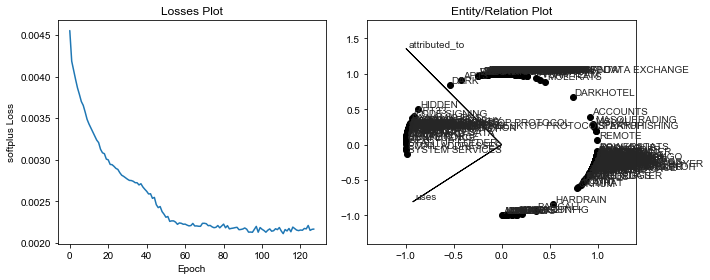

In [43]:
results.plot()

## 2.8 KRL model validation for Node prediction

### Evaluation Task
Knowledge graph embedding are usually evaluated on the task of link prediction. To this end, an evaluation set of triples Teval⊂E×R×E is provided, and for each triple (h,r,t)∈Teval in this set, two tasks are solved:

In the right-side prediction task, a pair of head entity and relation are given and aim to predict the tail, i.e. (h,r,?). To this end, the knowledge graph embedding model is used to score each of the possible choices (h,r,e) for e∈E. Higher scores indicate higher plausibility.

Analogously, in the left-side prediction task, a pair of relation and tail entity are provided and aim to predict the head, i.e. (?,r,t). Again, each possible choice (e,r,t) for e∈E is scored according to the knowledge graph embedding model.

#### Rank-Based Evaluation
In the rank-based evaluation protocol, the scores are used to sort the list of possible choices by decreasing score, and determine the rank of the true choice, i.e. the index in the sorted list. Smaller ranks indicate better performance. Based on these individual ranks, which are obtained for each evaluation triple and each side of the prediction (left/right), there exist several aggregation measures to quantify the performance of a model in a single number.

##### Ranking Types
While the aforementioned definition of the rank as “the index in the sorted list” is intuitive, it does not specify what happens when there are multiple choices with exactly the same score. Therefore, in previous work, different variants have been implemented, which yield different results in the presence of equal scores.

The optimistic rank assumes that the true choice is on the first position of all those with equal score.
The pessimistic rank assumes that the true choice is on the last position of all those with equal score.
The realistic rank is the mean of the optimistic and the pessimistic rank, and moreover the expected value over all permutations respecting the sort order.

The non-deterministic rank delegates the decision to the sort algorithm. Thus, the result depends on the internal tie breaking mechanism of the sort algorithm’s implementation.

In [44]:
results.metric_results

RankBasedMetricResults(mean_rank={'tail': {'worst': 29.741116751269036, 'best': 29.741116751269036, 'avg': 29.741116751269036}, 'both': {'worst': 40.97969543147208, 'best': 40.97969543147208, 'avg': 40.97969543147208}, 'head': {'worst': 52.21827411167513, 'best': 52.21827411167513, 'avg': 52.21827411167513}}, mean_reciprocal_rank={'tail': {'worst': 0.14678022889746511, 'best': 0.14678022889746511, 'avg': 0.14678022889746511}, 'both': {'worst': 0.09980318291636853, 'best': 0.09980318291636853, 'avg': 0.09980318291636853}, 'head': {'worst': 0.052826136935271946, 'best': 0.052826136935271946, 'avg': 0.052826136935271946}}, hits_at_k={'tail': {'worst': {1: 0.05583756345177665, 3: 0.12690355329949238, 5: 0.20304568527918782, 10: 0.350253807106599}, 'best': {1: 0.05583756345177665, 3: 0.12690355329949238, 5: 0.20304568527918782, 10: 0.350253807106599}, 'avg': {1: 0.05583756345177665, 3: 0.12690355329949238, 5: 0.20304568527918782, 10: 0.350253807106599}}, 'both': {'worst': {1: 0.030456852791

In [45]:
#model inferencing for link prediction (Train/Test)
model = results.model
# Predict tails
predicted_tails_df = model.get_tail_prediction_df('NANOCORE', 'uses')
print("\nPredict tail\n",predicted_tails_df[predicted_tails_df.in_training==True])
# Predict relations
predicted_relations_df = model.get_relation_prediction_df('NANOCORE', 'WINDOWS')
print("\npredict relation\n",predicted_relations_df[predicted_relations_df.in_training==True])
# Predict heads
predicted_heads_df = model.get_head_prediction_df('uses', 'WINDOWS')
print("\npredict head\n",predicted_heads_df[predicted_heads_df.in_training==True])


Predict tail
      tail_id tail_label    score  in_training
338      338    WINDOWS -0.09724         True



predict relation
    relation_id relation_label    score  in_training
1            1           uses -0.09724         True

predict head
      head_id    head_label     score  in_training
195      195      MIMIKATZ -0.029884         True
54        54         CHAOS -0.031167         True
52        52        CARBON -0.035084         True
177      177       LOKIBOT -0.039147         True
316      316           TOR -0.039876         True
269      269          RYUK -0.039949         True
198      198         MIRAI -0.040036         True
220      220       OCTOPUS -0.047773         True
265      265           RIG -0.048133         True
33        33       BISONAL -0.050959         True
120      120        EMPIRE -0.051496         True
66        66        COMNIE -0.058946         True
306      306       STUXNET -0.060866         True
169      169       KOMPLEX -0.060959         True
134      134           FTP -0.062889         True
51        51       CARBERP -0.063199         True
74        74

In [46]:
#Inferencing for unknow sample
# Predict tails
predicted_tails_df = model.get_tail_prediction_df('ELDERWOOD', 'uses')
print("\nPredict tail\n",predicted_tails_df[predicted_tails_df.in_training==True])
# Predict relations
predicted_relations_df = model.get_relation_prediction_df('ELDERWOOD', 'EXPLOITS')
print("\npredict relation\n",predicted_relations_df[predicted_relations_df.in_training==True])
# Predict heads
predicted_heads_df = model.get_head_prediction_df('uses', 'EXPLOITS')
print("\npredict head\n",predicted_heads_df[predicted_heads_df.in_training==True])


Predict tail
      tail_id tail_label     score  in_training
186      186    MALWARE -0.306212         True



predict relation
 Empty DataFrame
Columns: [relation_id, relation_label, score, in_training]
Index: []

predict head
      head_id         head_label     score  in_training
62        62             COBALT -0.013204         True
289      289             SOFACY -0.015743         True
172      172          LEAFMINER -0.018116         True
322      322              TURLA -0.018433         True
129      129               FIN7 -0.020163         True
98        98           DROPPING -0.041235         True
218      218         OCEANLOTUS -0.044938         True
171      171            LAZARUS -0.052478         True
248      248             QUASAR -0.058865         True
266      266              ROCKE -0.071136         True
202      202            MONSOON -0.072003         True
254      254             REAPER -0.074957         True
99        99  DROPPING ELEPHANT -0.079163         True
157      157          INCEPTION -0.084219         True
34        34              BLACK -0.163121         True


INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.
INFO:pykeen.evaluation.evaluator:Evaluation took 0.03s seconds


--- 29.74372172355652 seconds ---
KRL methods:  complex


The ConvE model should be trained with inverse triples.
This can be done by defining the TriplesFactory class with the _create_inverse_triples_ parameter set to true.
INFO:pykeen.models.unimodal.conv_e:Resolving None * None * None = 2.
INFO:pykeen.models.unimodal.conv_e:Resolved to 1 * 2 * 1 = 2.


ZeroDivisionError: float division by zero

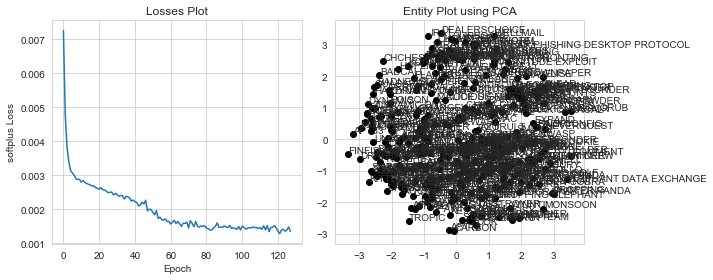

In [56]:
#########################
lis=['complex', 'complexliteral', 'conve', 'convkb', 'distmult', 'distmultliteral', 'ermlp', 'ermlpe', 'hole', 'kg2e', 'mure', 'ntn', 'pairre', 'proje', 'rescal', 'rgcn', 'rotate', 
'simple', 'structuredembedding', 'transd', 'transe', 'transh', 'transr', 'tucker', 'unstructured']


for i in lis:
    import time
    start_time = time.time()
    from pykeen.pipeline import pipeline
    tf = "chmis-train.tsv"
    results = pipeline(
        training=tf,
        testing="chmis-test.tsv",
       model=i,
        loss='softplus',
        model_kwargs=dict(embedding_dim=2),
        optimizer_kwargs=dict(lr=1.0e-1),
        training_kwargs=dict(num_epochs=128, use_tqdm_batch=False),
        evaluation_kwargs=dict(use_tqdm=False),
        random_seed=1,
        device='cpu',
    )
    print("--- %s seconds ---" % (time.time() - start_time))
    print("KRL methods: " ,i)
    results.plot()